<a href="https://colab.research.google.com/github/spirosChv/neuro208/blob/main/Practical_2_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spiking neuronal models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Make plots nicer  -- Execute this cell
def mystyle():
  """
  Create custom plotting style.

  Returns
  -------
  my_style : dict
      Dictionary with matplotlib parameters.

  """
  # color pallette
  style = {
      # Use LaTeX to write all text
      "text.usetex": False,
      "font.family": "DejaVu Sans",
      "font.weight": "bold",
      # Use 16pt font in plots, to match 16pt font in document
      "axes.labelsize": 16,
      "axes.titlesize": 20,
      "font.size": 16,
      # Make the legend/label fonts a little smaller
      "legend.fontsize": 14,
      "xtick.labelsize": 14,
      "ytick.labelsize": 14,
      "axes.linewidth": 2.5,
      "lines.markersize": 10.0,
      "lines.linewidth": 2.5,
      "xtick.major.width": 2.2,
      "ytick.major.width": 2.2,
      "axes.labelweight": "bold",
      "axes.spines.right": False,
      "axes.spines.top": False
  }

  return style


plt.rcParams.update(mystyle())

---
## About units

- Capacitance ($C_m$): $\text{Farad}$ or $\text{F}$, $1\text{F} = 1 \text{C}/\text{V} = 1 \text{s}/\Omega$, in SI $\text{kg}^{-1} \cdot \text{m}^{-2} \cdot \text{s}^4 \cdot \text{A}^2$
- Leak Conductance ($g_L$) in $\text{Siemens}$ or $\text{S}$ or $\Omega^{-1}$ or $\text{mho}$, in SI $1\text{S} = \text{kg}^{-1} \cdot \text{m}^{-2} \cdot \text{s}^3 \cdot \text{A}^2$
- Membrane time constant $\tau_m$ in $\text{seconds}$ or $\text{s}$

Thus,

\begin{equation}
\tau_m = C_m \cdot R_m = \frac{C_m}{g_L}
\end{equation}

is given in $\text{seconds}$. However, in Neurosciense we use time constants expressed in $\text{miliseconds}$ or $\text{ms}$.


Let's assume that $C_m = 2\text{pF}$ and $g_L = 0.1\text{nS}$, then $\tau_m = 20\text{ms}$.

---
## Example 1: Leaky Integrate-and-Fire (LIF) model

\begin{equation}
C_m \frac{dV}{dt} = -g_L (V-E_L) + I_e
\end{equation}

where $C_m$ is the membrane capacitance, $g_L$ and $E_L$ are the leak conductance and reversal potential, reespectively, and $I_e$ is an input current.

Spike mechanism:

\begin{equation}
\text{if } V \ge V_{th} \text{ then } V \leftarrow V_r
\end{equation}

In [3]:
# Simulation parameters
T = 2000  # ms
dt = 0.1  # ms
steps = int(T/dt)
t_vector = np.linspace(0, T, steps+1)

In [4]:
# Model Parameters
Cm = 300  # membrane capacitance in pF
gL = 15  # leaky conductance in nS
EL = -70  # leaky reversal potential in mV

Vth = -54  # threshold in mV
Vr = -80  # reset in mV

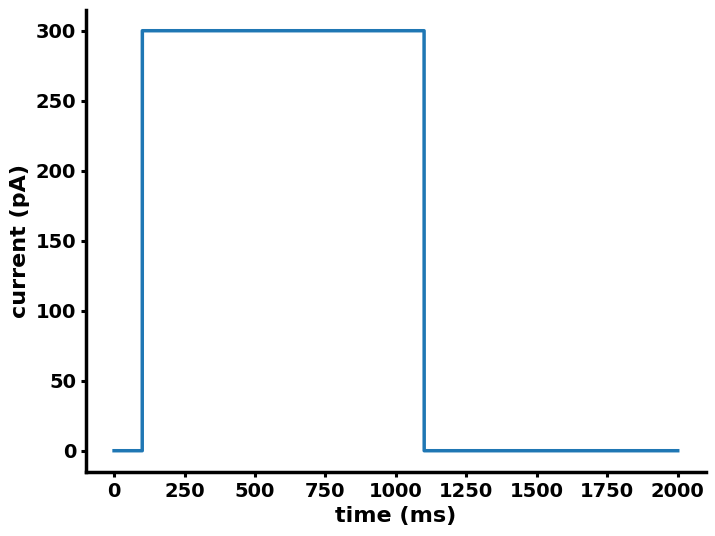

In [5]:
# Create the exteral current
Ie = np.zeros((len(t_vector), ))

t1 = 100  # ms
t2 = t1 + 1000  # ms

n1 = int(t1/dt)
n2 = int(t2/dt)

Ie[n1:n2 + 1] = 300  # current amplitude in pA

plt.figure(figsize=(8, 6))
plt.plot(t_vector, Ie)
plt.xlabel('time (ms)')
plt.ylabel('current (pA)')
plt.show()

In [6]:
# Simulation
V = np.zeros((len(t_vector), ))  # Array to store the voltage
V[0] = EL  # initialize voltage at rest
tspike = []  # empty list to store spiketimes.

# Write the Euler method
for n in range(steps):
  # calculate the derivative at time step `n`
  deriv = (-gL*(V[n]-EL) + Ie[n])/Cm
  # Update the voltage using Euler method
  V[n+1] = V[n] + dt*deriv

  # Spiking mechanism
  if V[n+1] > Vth:  # if V is greater than a threshold
    tspike.append(n*dt)  # record the spike time
    V[n+1] = Vr  # reset the voltage

In [7]:
# Print the spiketimes
for t in tspike:
  print(f"Spike at: {np.round(t, 1)} ms")

print(f"\nNumber of spikes: {len(tspike)}")

Spike at: 132.1 ms
Spike at: 172.3 ms
Spike at: 212.5 ms
Spike at: 252.7 ms
Spike at: 292.9 ms
Spike at: 333.1 ms
Spike at: 373.3 ms
Spike at: 413.5 ms
Spike at: 453.7 ms
Spike at: 493.9 ms
Spike at: 534.1 ms
Spike at: 574.3 ms
Spike at: 614.5 ms
Spike at: 654.7 ms
Spike at: 694.9 ms
Spike at: 735.1 ms
Spike at: 775.3 ms
Spike at: 815.5 ms
Spike at: 855.7 ms
Spike at: 895.9 ms
Spike at: 936.1 ms
Spike at: 976.3 ms
Spike at: 1016.5 ms
Spike at: 1056.7 ms
Spike at: 1096.9 ms

Number of spikes: 25


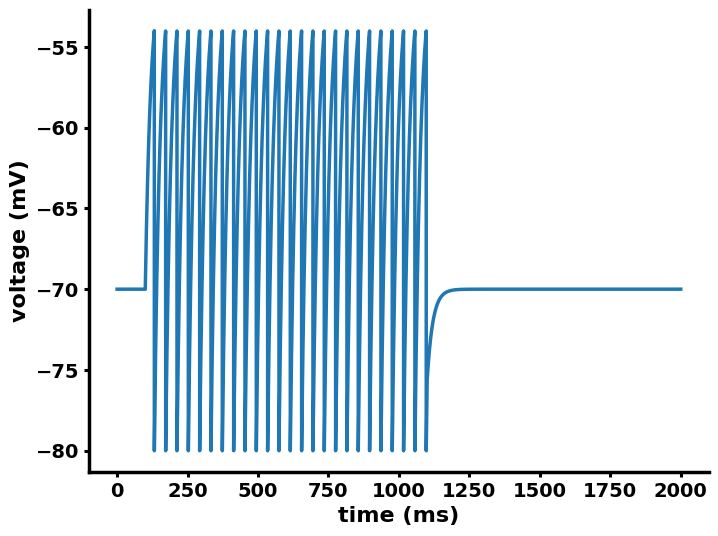

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(t_vector, V)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.show()

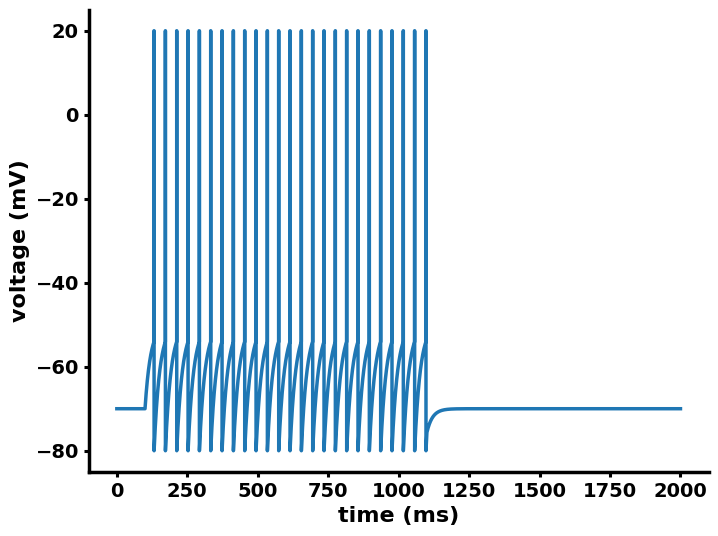

In [9]:
# Draw nicer spikes
for t in tspike:
  n = int(t/dt)
  V[n] = 20

plt.figure(figsize=(8, 6))
plt.plot(t_vector, V)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.show()

Let's add a refractory period, $t_{ref}$, during which the neuron cannot spike!

In [10]:
tref = 20  # refracrtory period in ms

In [11]:
V_LIF = np.zeros((len(t_vector), ))
V_LIF[0] = EL
tspike = [-1]  # add a negative value for programming convinience.
flag = True  # enable spiking mechanism, boolean: True or False

for n in range(steps):
  # calculate the derivative at time step `n`
  deriv = (-gL*(V_LIF[n]-EL) + Ie[n])/Cm
  # Update the voltage using Euler method
  V_LIF[n+1] = V_LIF[n] + dt*deriv

  # Spiking mechanism with refractoriness
  if V_LIF[n+1] > Vth and flag:
    tspike.append(n*dt)
    V_LIF[n+1] = Vr
    flag = False

  # If in refractory, clamp voltage at `Vr`
  if not flag:
    V_LIF[n + 1] = Vr

  # When feractory ends, renable the spiking mechanism
  if n*dt > tref + tspike[-1]:
    flag = True

In [12]:
# Print the spiketimes
tspike_LIF = tspike[1:]  # remove the 'fake' spiketime
for t in tspike_LIF:
  print(f"Spike at: {np.round(t, 1)} ms")

print(f"\nNumber of spikes: {len(tspike_LIF)}")

Spike at: 132.1 ms
Spike at: 192.4 ms
Spike at: 252.7 ms
Spike at: 313.0 ms
Spike at: 373.3 ms
Spike at: 433.6 ms
Spike at: 493.9 ms
Spike at: 554.2 ms
Spike at: 614.5 ms
Spike at: 674.8 ms
Spike at: 735.1 ms
Spike at: 795.4 ms
Spike at: 855.7 ms
Spike at: 916.0 ms
Spike at: 976.3 ms
Spike at: 1036.6 ms
Spike at: 1096.9 ms

Number of spikes: 17


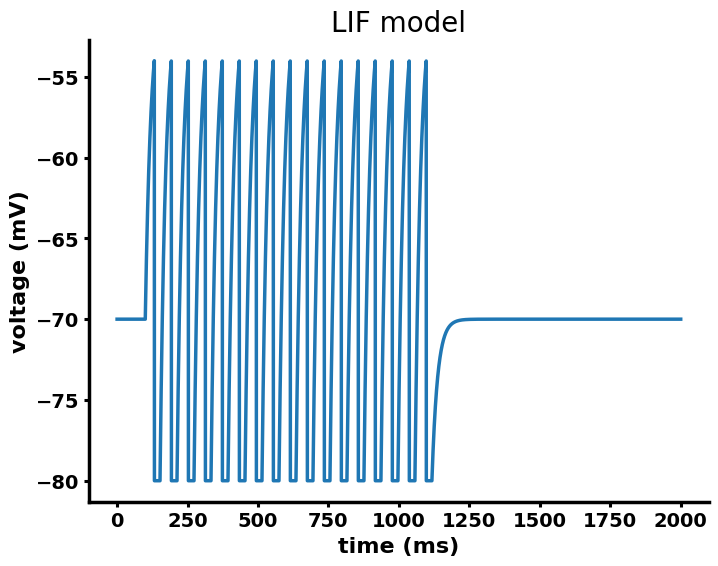

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(t_vector, V_LIF)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('LIF model')
plt.show()

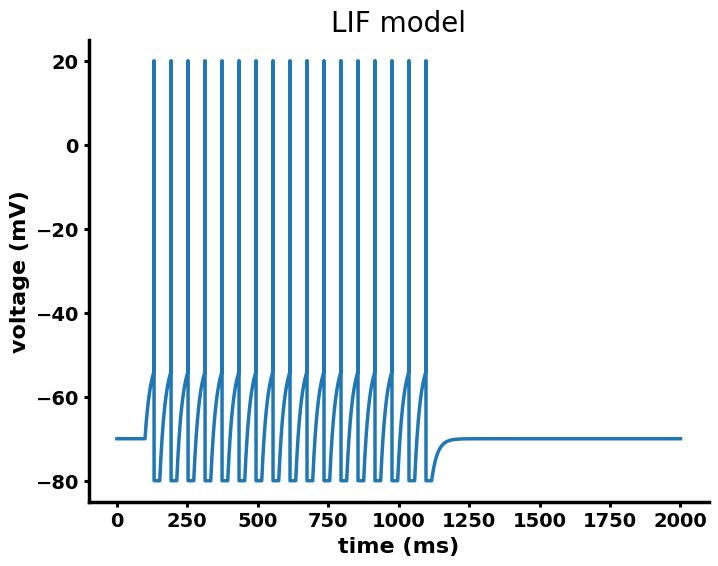

In [14]:
# Draw nicer spikes
for t in tspike_LIF:
  n = int(t/dt)
  V_LIF[n] = 20

plt.figure(figsize=(8, 6))
plt.plot(t_vector, V_LIF)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('LIF model')
plt.show()

---
## Example 2: Quadratic Integrate-and-Fire (QIF) model

\begin{equation}
C_m \frac{dV}{dt} = -g_L \frac{(V-E_L)(V_{th} - V)}{V_{th}-E_L} + I_e
\end{equation}


where $C_m$ is the membrane capacitance, $g_L$ and $E_L$ are the leak conductance and reversal potential, reespectively. $V_{th}$ is the spike threshold, and $I_e$ is an input current. Once the membrane potential crosses $V_{th}$, it diverges to infinity in finite time. In numerical simulation the integration is stopped if the membrane potential hits an arbitrary threshold $V_{peak}$ (much larger than $V_{th}$) at which the membrane potential is reset to a value $V_r$.


Spike mechanism:

\begin{equation}
\text{if } V \ge V_{peak} \text{ then } V \leftarrow V_r
\end{equation}

In [15]:
# Simulation parameters
T = 2000  # ms
dt = 0.1  # ms
steps = int(T/dt)
t_vector = np.linspace(0, T, steps+1)

# Model Parameters
Cm = 300  # membrane capacitance in pF
gL = 15  # leaky conductance in nS
EL = -70  # leaky reversal potential in mV

Vth = -54  # threshold in mV
Vr = -80  # reset in mV
Vpeak = 20 # peak potential (detection limit) in mV

In [16]:
V_QIF = np.zeros((len(t_vector), ))
V_QIF[0] = EL
tspike = [-1]  # add a negative value for programming convinience.
flag = True  # enable spiking mechanism, boolean: True or False

for n in range(steps):
  # calculate the derivative at time step `n`
  deriv = (-gL*(V_QIF[n]-EL)*(Vth-V_QIF[n])/(Vth-EL) + Ie[n])/Cm
  # Update the voltage using Euler method
  V_QIF[n+1] = V_QIF[n] + dt*deriv

  # Spiking mechanism
  if V_QIF[n+1] > Vpeak and flag:
    tspike.append(n*dt)
    V_QIF[n+1] = Vr
    flag = False

  # If in refractory, clamp V at `Vr`
  if not flag:
    V_QIF[n+1] = Vr

  # After refracrtory, re enable the spiking mechanism.
  if n*dt > tref + tspike[-1]:
    flag = True

In [17]:
# Print the spiketimes
tspike_QIF = tspike[1:]  # remove the 'fake' spiketime
for t in tspike_QIF:
  print(f"Spike at: {np.round(t, 1)} ms")

print(f"\nNumber of spikes: {len(tspike_QIF)}")

Spike at: 136.9 ms
Spike at: 201.6 ms
Spike at: 266.3 ms
Spike at: 331.0 ms
Spike at: 395.7 ms
Spike at: 460.4 ms
Spike at: 525.1 ms
Spike at: 589.8 ms
Spike at: 654.5 ms
Spike at: 719.2 ms
Spike at: 783.9 ms
Spike at: 848.6 ms
Spike at: 913.3 ms
Spike at: 978.0 ms
Spike at: 1042.7 ms
Spike at: 1109.1 ms

Number of spikes: 16


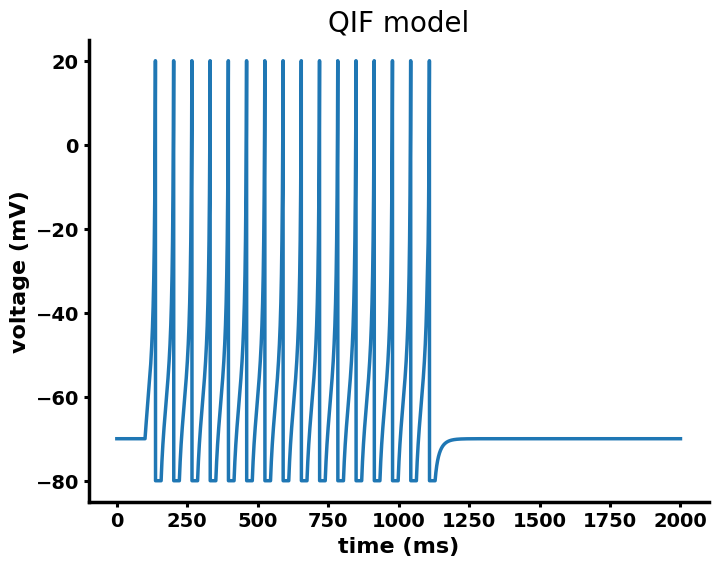

In [18]:
for t in tspike_QIF:
  n = int(t/dt)
  V_QIF[n] = 20

plt.figure(figsize=(8, 6))
plt.plot(t_vector, V_QIF)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('QIF model')
plt.show()

---
## Example 3: Exponential Integrate-and-Fire (EIF) model

\begin{equation}
C_m \frac{dV}{dt} = -g_L (V-E_L) + g_L \Delta_T \text{exp} \left( \frac{V-V_T}{\Delta_T} \right) + I_e
\end{equation}

where $C_m$ is the membrane capacitance, $g_L$ and $E_L$ are the leak conductance and reversal potential, reespectively. $\Delta_T$ controls the sharpness of action potential initiation (typical values $ \sim 1\text{mV}$ for pyramidal neurons), $V_T$ denotes the intrinsic membrane potential threshold. Once the membrane potential crosses $V_{T}$, it diverges to infinity in finite time. In numerical simulation the integration is stopped if the membrane potential hits an arbitrary threshold $V_{peak}$ (much larger than $V_{T}$) at which the membrane potential is reset to a value $V_r$.

In the limit $\Delta_T → 0$, the EIF becomes LIF.

Spike mechanism:

\begin{equation}
\text{if } V \ge V_{peak} \text{ then } V → V_r
\end{equation}

In [19]:
# Simulation parameters
T = 2000  # ms
dt = 0.1  # ms
steps = int(T/dt)
t_vector = np.linspace(0, T, steps+1)

# Model Parameters
Cm = 300  # membrane capacitance in pF
gL = 15  # leaky conductance in nS
EL = -70  # leaky reversal potential in mV

VT = -54  # threshold in mV
DeltaT = 2  # AP sharpness (slope factor) in mV
Vr = -80  # reset in mV
Vpeak = 20 # peak potential (detection limit) in mV

In [20]:
V_EIF = np.zeros((len(t_vector), ))
V_EIF[0] = EL
tspike = [-1]  # add a negative value for programming convinience.
flag = True  # enable spiking mechanism, boolean: True or False

for n in range(steps):
  # calculate the derivative at time step `n`
  deriv_v = (-gL*(V_EIF[n]-EL) + gL*DeltaT*np.exp((V_EIF[n]-VT)/DeltaT) + Ie[n])/Cm
  # Update the voltage using Euler method
  V_EIF[n+1] = V_EIF[n] + dt*deriv_v

  # Spiking mechanism
  if V_EIF[n+1] > Vpeak and flag:
    tspike.append(n*dt)
    V_EIF[n+1] = Vr
    flag = False

  # If in refractory, clamp V at `Vr`
  if not flag:
    V_EIF[n+1] = Vr

  # After refracrtory, re enable the spiking mechanism.
  if n*dt > tref + tspike[-1]:
    flag = True

In [21]:
# Print the spiketimes
tspike_EIF = tspike[1:]  # remove the 'fake' spiketime
for t in tspike_EIF:
  print(f"Spike at: {np.round(t, 1)} ms")

print(f"\nNumber of spikes: {len(tspike_EIF)}")

Spike at: 143.3 ms
Spike at: 214.9 ms
Spike at: 286.5 ms
Spike at: 358.1 ms
Spike at: 429.7 ms
Spike at: 501.3 ms
Spike at: 572.8 ms
Spike at: 644.4 ms
Spike at: 716.0 ms
Spike at: 787.6 ms
Spike at: 859.2 ms
Spike at: 930.8 ms
Spike at: 1002.4 ms
Spike at: 1074.0 ms

Number of spikes: 14


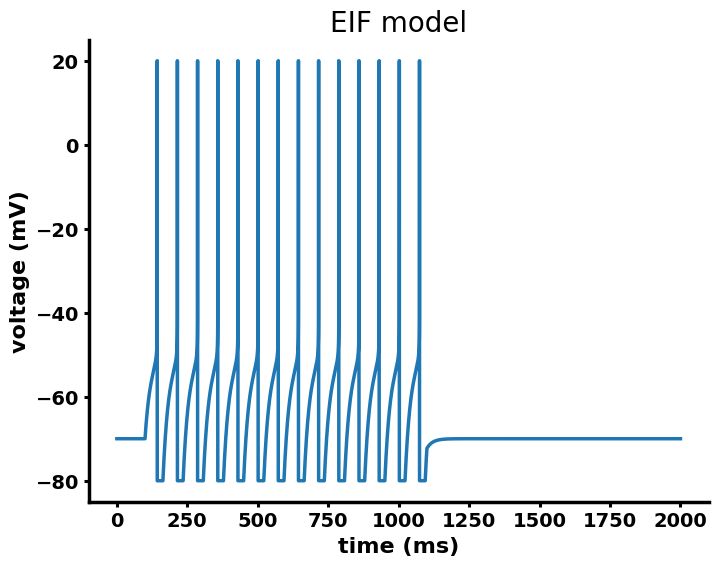

In [22]:
for t in tspike_EIF:
  n = int(t/dt)
  V_EIF[n] = 20

plt.figure(figsize=(8, 6))
plt.plot(t_vector, V_EIF)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('EIF model')
plt.show()

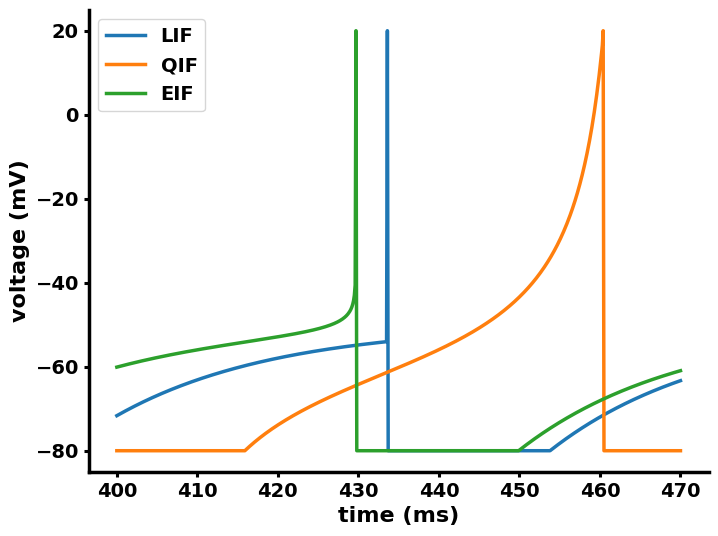

In [23]:
# Plot all together
t1 = 400
t2 = 470

n1 = int(t1/dt)
n2 = int(t2/dt)

plt.figure(figsize=(8, 6))
plt.plot(t_vector[n1:n2+1], V_LIF[n1:n2+1], label='LIF')
plt.plot(t_vector[n1:n2+1], V_QIF[n1:n2+1], label='QIF')
plt.plot(t_vector[n1:n2+1], V_EIF[n1:n2+1], label='EIF')
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.legend()
plt.show()

---
## Example 4: Adaptive Exponential Integrate-and-Fire neuronal (aEIF) model

\begin{align}
C_m \frac{dV}{dt} &= -g_L (V-E_L) + g_L \Delta_T \text{exp} \left( \frac{V-V_T}{\Delta_T} \right) - w + I_e \\
\tau_w \frac{dw}{dt} &= \alpha (V-E_L) - w
\end{align}

- where $C_m$ is the membrane capacitance, $g_L$ and $E_L$ are the leak conductance and reversal potential, reespectively.

- $\Delta_T$ controls the sharpness of action potential initiation (typical values $ \sim 1\text{mV}$ for pyramidal neurons), $V_T$ denotes the intrinsic membrane potential threshold. Once the membrane potential crosses $V_{T}$, it diverges to infinity in finite time. In numerical simulation the integration is stopped if the membrane potential hits an arbitrary threshold $V_{peak}$ (much larger than $V_{T}$) at which the membrane potential is reset to a value $V_r$.

- $\tau_w$ is the time constant and $\alpha$ represents the level of **subthreshold adaptation**. At each firing time, the variable $w$ is increased by anamount $b$, which accounts for **spike-triggered adaptation**.

Spike mechanism:

\begin{equation}
\text{if } V \ge V_{peak} \text{ then } V \leftarrow V_r, w \leftarrow w + b
\end{equation}

In [24]:
# Simulation parameters
T = 2000  # ms
dt = 0.1  # ms
steps = int(T/dt)
t_vector = np.linspace(0, T, steps+1)

# Model Parameters
Cm = 300  # membrane capacitance in pF
gL = 15  # leaky conductance in nS
EL = -70  # leaky reversal potential in mV

VT = -54  # threshold in mV
DeltaT = 2  # AP sharpness (slope factor) in mV
Vr = -80  # reset in mV
Vpeak = 20 # peak potential (detection limit) in mV

# Adaptation
tau_w = 144 # adaptation time constant in ms
alpha = 4  # subthreshold adaptation in nS
b = 80.5 # spike-triggered adaptation in pA

In [25]:
V_aEIF = np.zeros((len(t_vector), ))
V_aEIF[0] = EL
w = np.zeros((len(t_vector), ))
w[0] = 0
tspike = [-1]  # add a negative value for programming convinience.
flag = True  # enable spiking mechanism, boolean: True or False

for n in range(steps):
  # calculate the derivatives at time step `n`
  deriv_v = (-gL*(V_aEIF[n]-EL) + gL*DeltaT*np.exp((V_aEIF[n]-VT)/DeltaT) - w[n] + Ie[n])/Cm
  deriv_w = (alpha*(V_aEIF[n]-EL) - w[n])/tau_w

  # Update the voltage and the w with Euler method
  V_aEIF[n+1] = V_aEIF[n] + dt*deriv_v
  w[n+1] = w[n] + dt*deriv_w

  # Spiking mechanism
  if V_aEIF[n+1] > Vpeak and flag:
    tspike.append(n*dt)
    V_aEIF[n+1] = Vr
    w[n+1] += b
    flag = False

  # If in refractory, clamp V at `Vr`
  if not flag:
    V_aEIF[n+1] = Vr

  # After refracrtory, re enable the spiking mechanism.
  if n*dt > tref + tspike[-1]:
    flag = True

In [26]:
# Print the spiketimes
tspike_aEIF = tspike[1:]  # remove the 'fake' spiketime
for t in tspike_aEIF:
  print(f"Spike at: {np.round(t, 1)} ms")

print(f"\nNumber of spikes: {len(tspike_aEIF)}")

Spike at: 145.3 ms
Spike at: 265.1 ms
Spike at: 455.2 ms
Spike at: 664.8 ms
Spike at: 875.6 ms
Spike at: 1086.4 ms

Number of spikes: 6


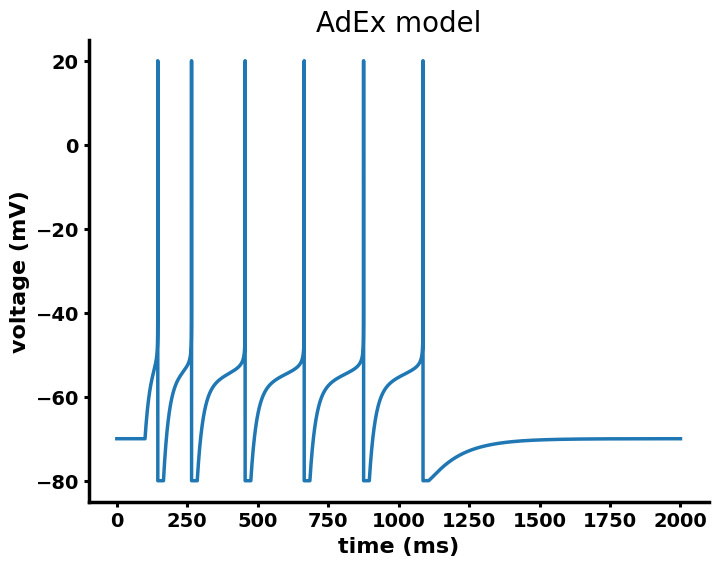

In [27]:
for t in tspike_aEIF:
  n = int(t/dt)
  V_aEIF[n] = 20

plt.figure(figsize=(8, 6))
plt.plot(t_vector, V_aEIF)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('AdEx model')
plt.show()

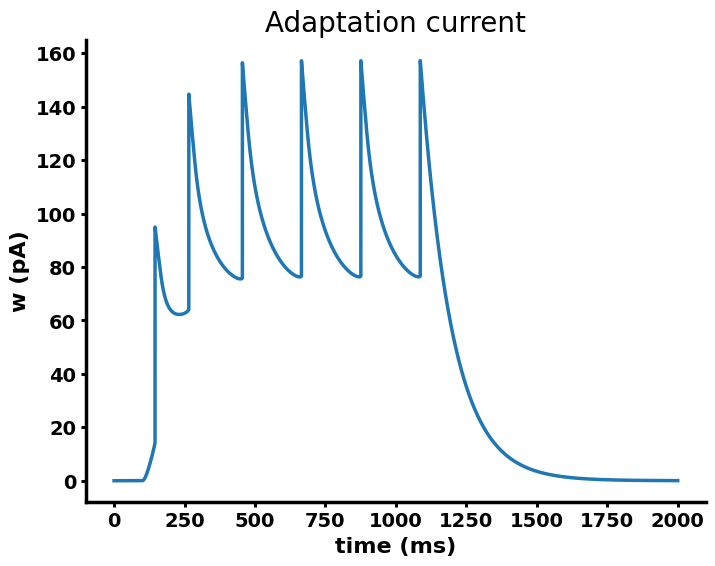

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(t_vector, w)
plt.xlabel('time (ms)')
plt.ylabel('w (pA)')
plt.title('Adaptation current')
plt.show()

---
## Example 5: Conductance-Based Adaptive Exponential Integrate-and-Fire (CAdEx) Model

\begin{align}
C_m \frac{dV}{dt} &= -g_L (V-E_L) + g_L \Delta_T \text{exp} \left( \frac{V-V_T}{\Delta_T} \right) - g_A(V-E_A) + I_e \\
\tau_A \frac{g_A}{dt} &= \frac{\bar{g}_A}{1+\text{exp}(\frac{V_A-V}{\Delta_A})} - g_A
\end{align}

- $C_m$ is the membrane capacitance and $g_L$ and $E_L$ are the leak conductance and reversal potential, respectively.
- $V_T$ is the spike threshold and $\Delta_T$ is the slope of the spike initiation, $E_A$ is the reversal potential of the adaptation conductance, and $I_e$ is an input current.
- $\tau_A$ is the time constant of adaptation, $\bar{g}_A$ is the maximal subthreshold adaptation conductance, $V_A$ is the subthreshold adaptation activation voltage, and $\Delta_A$ is the slope of subthreshold adaptation.

Spike mechanism:

\begin{equation}
\text{if } V \ge V_{peak} \text{ then } V \leftarrow V_r, g_A \leftarrow g_A + \delta g_A
\end{equation}

In [29]:
# Simulation parameters
T = 2000  # ms
dt = 0.1  # ms
steps = int(T/dt)
t_vector = np.linspace(0, T, steps+1)

# Model Parameters
Cm = 300  # membrane capacitance in pF
gL = 15  # leaky conductance in nS
EL = -70  # leaky reversal potential in mV

VT = -54  # threshold in mV
DeltaT = 2  # AP sharpness (slope factor) in mV
Vr = -80  # reset in mV
Vpeak = -40 # peak potential (detection limit) in mV

# Adaptation
tau_A = 144 # adaptation time constant in ms
EA = -70  # reversal potential of the adaptation in mV
gAbar = 10  # maximal subthreshold adaptation in nS
VA = -50  # subthreshold adaptation activation voltage in mV
DeltaA = 5  # slope of subthreshold adaptation in mV
deltagA = 5 # spike-triggered adaptation in pA

In [30]:
V_CAdEx = np.zeros((len(t_vector), ))
V_CAdEx[0] = EL
gA = np.zeros((len(t_vector), ))
gA[0] = 0
tspike = [-1]  # add a negative value for programming convinience.
flag = True  # enable spiking mechanism, boolean: True or False

for n in range(steps):
  # calculate the derivative at time step `n`
  deriv_v = (-gL*(V_CAdEx[n]-EL) + gL*DeltaT*np.exp((V_CAdEx[n]-VT)/DeltaT) - gA[n]*(V_CAdEx[n] - EA) + Ie[n])/Cm
  deriv_gA = (gAbar/(1+np.exp((VA-V_CAdEx[n])/DeltaA)) - gA[n])/tau_A

  # Update the voltage and the gA with Euler method
  V_CAdEx[n+1] = V_CAdEx[n] + dt*deriv_v
  gA[n+1] = gA[n] + dt*deriv_gA

  # Spiking mechanism
  if V_CAdEx[n+1] > Vpeak and flag:
    tspike.append(n*dt)
    V_CAdEx[n+1] = Vr
    gA[n+1] += deltagA  # if spike, increase gA by δgA.
    flag = False

  # If in refractory, clamp V at `Vr`
  if not flag:
    V_CAdEx[n+1] = Vr

  # After refracrtory, re enable the spiking mechanism.
  if n*dt > tref + tspike[-1]:
    flag = True

In [31]:
# Print the spiketimes
tspike_CAdEx = tspike[1:]  # remove the 'fake' spiketime
for t in tspike_CAdEx:
  print(f"Spike at: {np.round(t, 1)} ms")

print(f"\nNumber of spikes: {len(tspike_CAdEx)}")

Spike at: 144.7 ms
Spike at: 254.8 ms
Spike at: 427.9 ms
Spike at: 616.7 ms
Spike at: 806.1 ms
Spike at: 995.5 ms

Number of spikes: 6


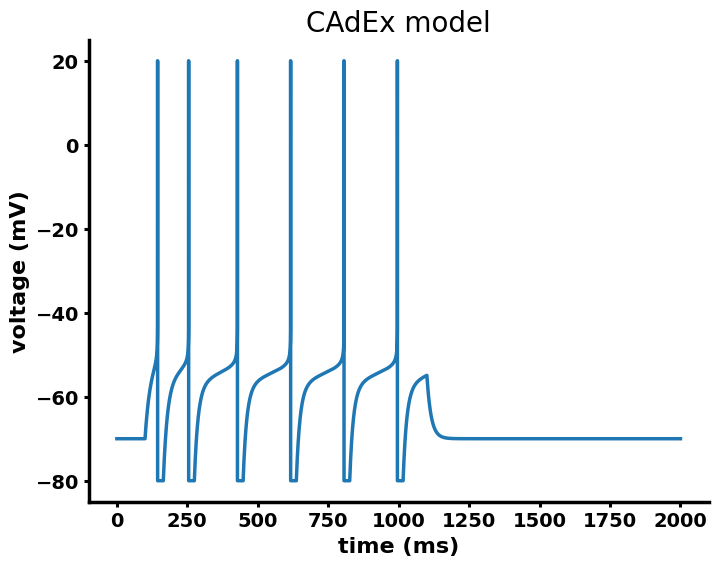

In [32]:
for t in tspike_CAdEx:
  n = int(t/dt)
  V_CAdEx[n] = 20

plt.figure(figsize=(8, 6))
plt.plot(t_vector, V_CAdEx)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('CAdEx model')
plt.show()

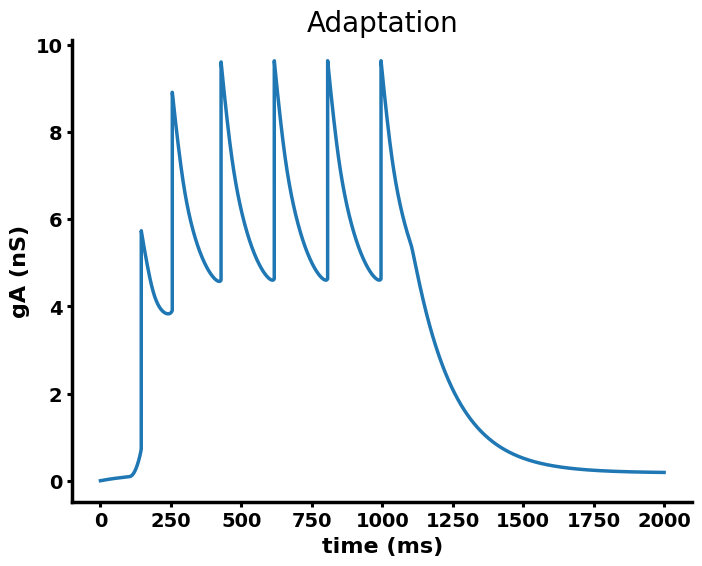

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(t_vector, gA)
plt.xlabel('time (ms)')
plt.ylabel('gA (nS)')
plt.title('Adaptation')
plt.show()

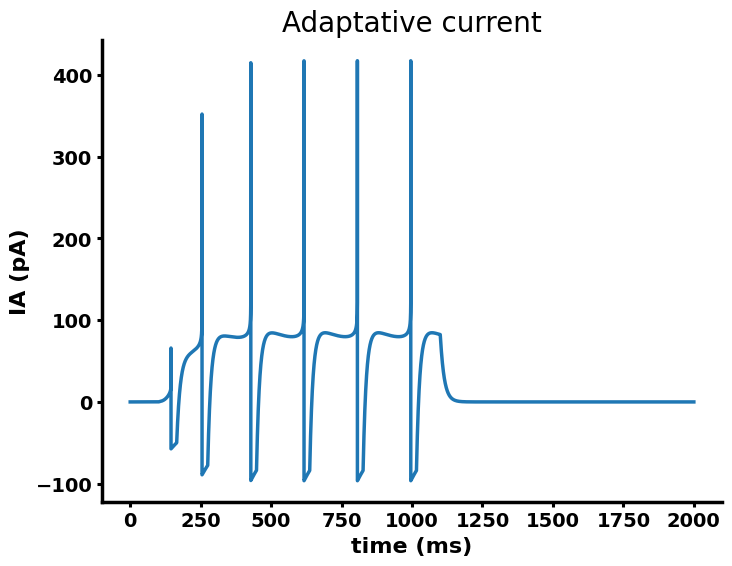

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(t_vector, gA*(V_CAdEx-EA))
plt.xlabel('time (ms)')
plt.ylabel('IA (pA)')
plt.title('Adaptative current')
plt.show()

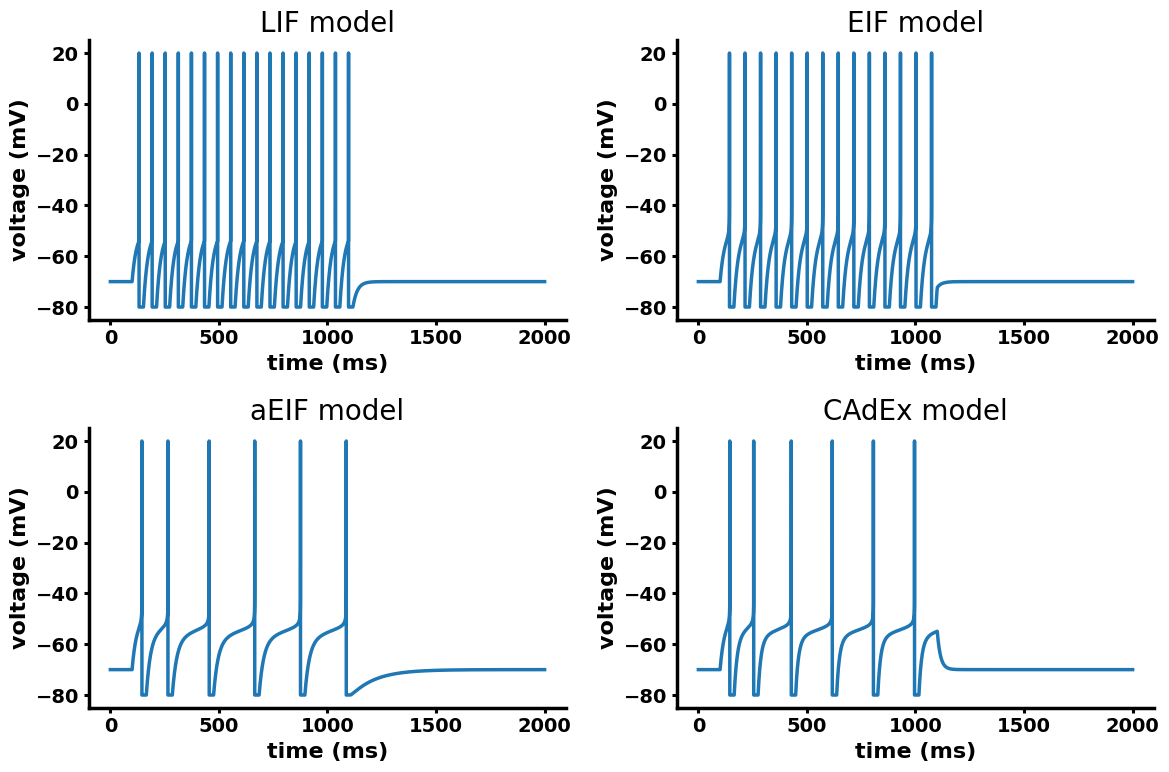

In [35]:
# Plot all together
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t_vector, V_LIF)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('LIF model')

plt.subplot(2, 2, 2)
plt.plot(t_vector, V_EIF)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('EIF model')

plt.subplot(2, 2, 3)
plt.plot(t_vector, V_aEIF)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('aEIF model')

plt.subplot(2, 2, 4)
plt.plot(t_vector, V_CAdEx)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.title('CAdEx model')

plt.tight_layout()
plt.show()

---
## How to add a synapse model using differential equations - Exponential synapse

Let's assume that our synapse model is the simple exponential decay. We know that:

\begin{equation}
g_{syn}(t) = \bar{g}_{syn} \text{exp} \left( -\frac{t-t_s}{\tau} \right) \mathcal{H}(t-t_s)
\end{equation}

This is translated into a differential equation:

\begin{equation}
\tau \frac{dg_{syn}}{dt} = -g_{syn} + \delta(t-t_s)
\end{equation}

where $\delta(\cdot)$ is the Dirac function:


\begin{equation}
  \delta(t-\theta) = \cases{1 & $\text{if } t = \theta$ \cr
                          0 & \text{otherwise}
                   }
\end{equation}

and denotes the time of the presynaptic spike.

In [36]:
# Simulation parameters
T = 500  # ms
dt = 0.1  # ms
steps = int(T/dt)
t_vector = np.linspace(0, T, steps+1)

V_LIF = np.zeros((len(t_vector), ))
V_LIF[0] = EL
tspike = [-1]  # add a negative value for programming convinience.
flag = True

g_syn = np.zeros((len(t_vector), ))
I_syn = np.zeros((len(t_vector), ))
tau = 10  # ms
Esyn = 0  # mV
gbar = 0.2  # nS

# generate random presynaptic spikes
nspikes_pre = 10
pre = np.random.choice(t_vector, size=nspikes_pre, replace=False)

for n in range(steps):
  # Check if there is a presynaptic spike
  if n*dt in pre:
    g_syn[n] += 1

  # Calculate the synaptic current at time step `n`
  I_syn[n] = -gbar*g_syn[n]*(V[n] - Esyn)
  # Calculate the derivatives of the equations
  deriv_v = (-gL*(V_LIF[n]-EL) + I_syn[n])/Cm
  deriv_g = -g_syn[n]/tau
  # Update the voltage and the synaptic conductance using the Euler method
  V_LIF[n+1] = V_LIF[n] + dt*deriv_v
  g_syn[n+1] = g_syn[n] + dt*deriv_g

  # Spiking mechanism
  if V_LIF[n+1] > Vth and flag:
    tspike.append(n*dt)
    V_LIF[n+1] = Vr
    flag = False

  # Clamp voltage at Vr
  if not flag:
    V_LIF[n + 1] = Vr

  # Change the flag of refractory period
  if n*dt > tref + tspike[-1]:
    flag = True

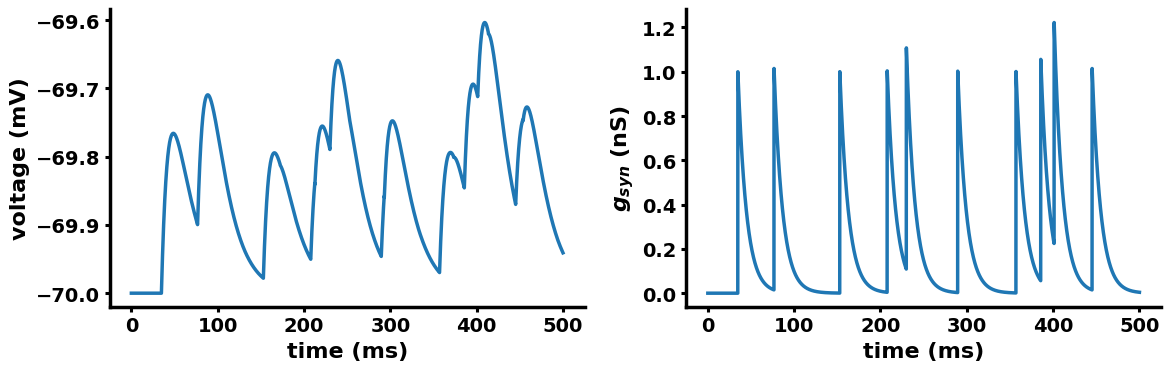

In [37]:
# Draw nice spikes
for t in tspike[1:]:
  n = int(t/dt)
  V_LIF[n] = 20

# Plot of the membrane potential and synaptic conductance
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(t_vector, V_LIF)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')

plt.subplot(1, 2, 2)
plt.plot(t_vector, g_syn)
plt.xlabel('time (ms)')
plt.ylabel(r'$g_{syn}$ (nS)')

plt.tight_layout()
plt.show()

---
## How to add a synapse model using differential equations - Double exponential synapse

Let's assume that our synapse model is dual exponential with $\tau_d > \tau_r$. We know that:

\begin{equation}
g_{syn}(t) = \bar{g}_{syn} f \left( \text{exp} \left( -\frac{t-t_s}{\tau_d} \right) - \text{exp} \left( -\frac{t-t_s}{\tau_r} \right)\right) \mathcal{H}(t-t_s)
\end{equation}

where (assuming $t_s=0$)

\begin{equation}
f = \frac{1}{\left( \text{exp} \left( -\frac{t_{peak}}{\tau_d} \right) - \text{exp} \left( -\frac{t_{peak}}{\tau_r} \right)\right) \left( \frac{\tau_d \tau_r}{\tau_d - \tau_r}\right)}
\end{equation}

and

\begin{equation}
t_{peak} = \frac{\tau_d \tau_r}{\tau_d - \tau_r} \text{ln} \left( \frac{\tau_d}{\tau_r}\right)
\end{equation}


This is translated into a system of differential equations:

\begin{align}
\frac{dg_{syn}}{dt} &= -\frac{g_{syn}}{\tau_d} + x_{syn}\\
\frac{dx_{syn}}{dt} &= -\frac{x_{syn}}{\tau_r} + \delta(t-t_s)
\end{align}

where $\delta(\cdot)$ is the Dirac function:


\begin{equation}
  \delta(t-\theta) = \cases{1 & $\text{if } t = \theta$ \cr
                          0 & \text{otherwise}
                   }
\end{equation}

and denotes the time of the presynaptic spike.

<br>

**Note:**
- If $\tau_d-\tau_r$ is very small compared to $\tau_r$, this is an alpha synapse with time constant $\tau_d$, e.g., let $\tau_r=9.9 \text{ms}$ and $\tau_d=10 \text{ms}$.
- If $\tau_r/\tau_d$ is very small, this is a single exponential decay with time constant $\tau_d$, e.g., let $\tau_r=0.1 \text{ms}$.

In [38]:
# Simulation parameters
T = 500  # ms
dt = 0.1  # ms
steps = int(T/dt)
t_vector = np.linspace(0, T, steps+1)

# Model Parameters
Cm = 300  # membrane capacitance in pF
gL = 15  # leaky conductance in nS
EL = -70  # leaky reversal potential in mV
Vth = -54  # threshold in mV
Vr = -80  # reset in mV

V_LIF = np.zeros((len(t_vector), ))
V_LIF[0] = EL
tspike = [-1]  # add a negative value for programming convinience.
flag = True

g_syn = np.zeros((len(t_vector), ))
x_syn = np.zeros((len(t_vector), ))
I_syn = np.zeros((len(t_vector), ))
tau_r = 9.9  # ms
tau_d = 10  # ms
Esyn = 0  # mV
gbar = 0.2  # nS

# Calculate the theoretical peak value - scaling factor `f`
t_peak = (tau_d * tau_r) / (tau_d - tau_r) * np.log(tau_d/tau_r)
f = 1/((np.exp(-t_peak/tau_d) - np.exp(-t_peak/tau_r)) * ((tau_d * tau_r) / (tau_d - tau_r)))

# generate random presynaptic spikes
nspikes_pre = 10
pre = np.random.choice(t_vector, size=nspikes_pre, replace=False)

for n in range(steps):
  # Check if there is a presynaptic spike, if yes update x_syn
  if n*dt in pre:
    x_syn[n] += 1

  # Calculate the synaptic current
  I_syn[n] = -gbar*g_syn[n]*f*(V[n] - Esyn)
  # Calculate the derivatives of the equations
  deriv_v = (-gL*(V_LIF[n]-EL) + I_syn[n])/Cm
  deriv_g = -g_syn[n]/tau_d + x_syn[n]
  deriv_x = -x_syn[n]/tau_r
  # Update using the Euler method
  V_LIF[n+1] = V_LIF[n] + dt*deriv_v
  g_syn[n+1] = g_syn[n] + dt*deriv_g
  x_syn[n+1] = x_syn[n] + dt*deriv_x

  # Spiking mechanism
  if V_LIF[n+1] > Vth and flag:
    tspike.append(n*dt)
    V_LIF[n+1] = Vr
    flag = False

  # Clamp voltage at Vr
  if not flag:
    V_LIF[n + 1] = Vr

  # Change the flag of refractory period
  if n*dt > tref + tspike[-1]:
    flag = True

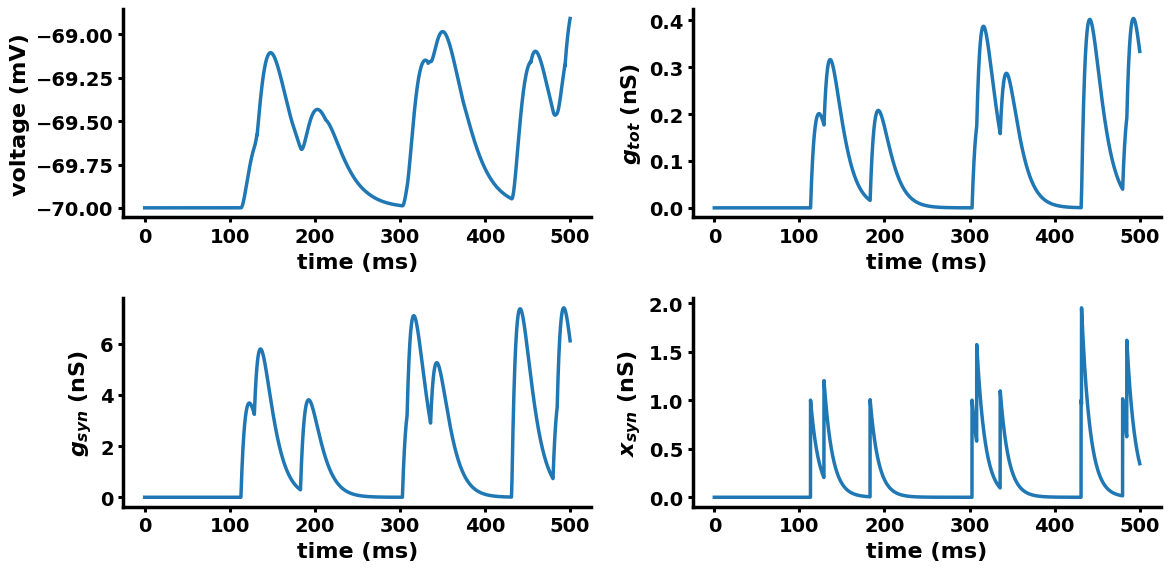

In [39]:
# Draw nice spikes
for t in tspike[1:]:
  n = int(t/dt)
  V_LIF[n] = 20

# Plot of the membrane potential and synaptic conductance
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t_vector, V_LIF)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')

plt.subplot(2, 2, 2)
plt.plot(t_vector, gbar*f*g_syn)
plt.xlabel('time (ms)')
plt.ylabel(r'$g_{tot}$ (nS)')

plt.subplot(2, 2, 3)
plt.plot(t_vector, g_syn)
plt.xlabel('time (ms)')
plt.ylabel(r'$g_{syn}$ (nS)')

plt.subplot(2, 2, 4)
plt.plot(t_vector, x_syn)
plt.xlabel('time (ms)')
plt.ylabel(r'$x_{syn}$ (nS)')

plt.tight_layout()
plt.show()